<a href="https://colab.research.google.com/github/Sehar-Gillani/Whisper/blob/main/UWARN_Analysisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/UWARN/UWARN_Dengue_positive_data_031723.xlsx')

In [ ]:
import pandas as pd

In [ ]:
df.head()

,DENGUE ANTIGEN positive date,DENGUE ANTIBODY positive date,AGE,GENDER,Dengue severity,LENGTH OF HOSPITAL STAY,DAYS OF ILLNESS,Hypertension,Diabetes,Cardiovascular disease,...,LEUCOCYTES,NITRITE,LEUKOCYTE. ESTERASE,BACTERIA,PROTEIN (g/l),RBC,Hemoglobin (/ul),GLUCOSE (mmol/l),KETONE,URINE C/S
0,2021-06-19 00:00:00,NaN,46,F,Dengue with warning signs,4.0,7.0,yes,yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-06-19 00:00:00,NaN,44,F,Dengue with warning signs,4.0,9.0,yes,no,no,...,none,NEGATIVE,NEGATIVE,MODERATE,2 (3+),>20,5 (1+),2 (1+),1 (1+),NaN
2,NaN,2021-07-01 00:00:00,12,F,Dengue without warning signs,2.0,5.0,no,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-10 00:00:00,NaN,56,M,Dengue without warning signs,3.0,8.0,yes,no,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-09-16 00:00:00,NaN,20,M,Dengue without warning signs,6.0,3.0,no,no,no,...,none,NEGATIVE,NEGATIVE,NIL,0.25 (1+),NaN,25(2+),NIL,NIL,no growth


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pylab as plt
import seaborn as sns
from tqdm import tqdm
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as st

In [ ]:
df.describe()

,AGE,LENGTH OF HOSPITAL STAY,DAYS OF ILLNESS,POPULATION DENSITY (Per km2),LOWEST TEMP (C),HIGHEST TEMP (C),HUMIDITY(%),MEAN DAY TIME TEMPERATURE (C),HIGHEST PLATELET,LOWEST PLATELET,...,HEMOGLOBIN,Neutrophils,Lymphocytes,LOWEST HEMATOCRIT,HIGHEST HEMATOCRIT,difference of hematocrit,% change in Hematocrit,CRET,ALT,AST
count,336.000000,294.000000,255.000000,326.000000,323.000000,323.000000,323.000000,323.000000,314.000000,327.000000,...,327.000000,331.000000,331.000000,314.000000,327.000000,315.000000,314.00000,258.000000,273.000000,258.000000
mean,34.389881,2.632653,4.305882,19992.061442,24.464396,33.504644,69.724458,28.984520,190.082803,61.666667,...,12.698165,55.483082,33.232628,37.134395,42.390214,5.389206,14.90949,1.009302,188.124542,242.895349
std,13.416400,1.658906,2.094369,14415.559653,4.140521,2.795706,14.590314,2.613523,114.516874,53.957853,...,2.077840,20.370063,18.857506,5.439610,5.476741,3.706022,10.85289,0.685133,407.860188,383.858042
min,11.000000,0.000000,1.000000,20.590000,12.000000,19.000000,16.000000,17.500000,19.000000,7.000000,...,4.100000,8.700000,4.300000,20.600000,25.900000,0.100000,0.30000,0.200000,13.000000,17.000000
25%,24.000000,2.000000,3.000000,6780.000000,21.000000,32.000000,63.000000,28.000000,106.250000,22.000000,...,11.500000,39.400000,17.800000,33.425000,38.600000,3.000000,7.30750,0.800000,48.000000,62.000000
50%,32.000000,2.000000,4.000000,20686.000000,26.000000,33.000000,74.000000,29.500000,176.000000,45.000000,...,12.900000,58.000000,32.000000,37.900000,43.100000,4.800000,12.78500,0.900000,99.000000,138.000000
75%,43.000000,3.000000,5.000000,23866.000000,27.000000,35.000000,79.000000,30.500000,248.000000,90.000000,...,13.900000,72.550000,46.850000,41.175000,46.000000,6.600000,19.08750,1.100000,209.000000,283.000000
max,75.000000,11.000000,14.000000,43064.000000,33.000000,40.000000,94.000000,35.000000,553.000000,355.000000,...,18.400000,90.000000,81.600000,51.300000,59.900000,33.700000,107.27000,9.500000,5241.000000,4558.000000


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DENGUE ANTIGEN positive date   293 non-null    object 
 1   DENGUE ANTIBODY positive date  46 non-null     object 
 2   AGE                            336 non-null    int64  
 3   GENDER                         336 non-null    object 
 4   Dengue severity                336 non-null    object 
 5   LENGTH OF HOSPITAL STAY        294 non-null    float64
 6   DAYS OF ILLNESS                255 non-null    float64
 7   Hypertension                   336 non-null    object 
 8   Diabetes                       336 non-null    object 
 9   Cardiovascular disease         336 non-null    object 
 10  Associated conditions          114 non-null    object 
 11  Effusions                      336 non-null    object 
 12  Antibiotics used?              336 non-null    obj

In [ ]:
df.columns = df.columns.str.replace(" ", "_")

In [ ]:
columns_with_na1 = ['POPULATION_DENSITY_(Per_km2)','HUMIDITY(%)', 'MEAN_DAY_TIME_TEMPERATURE_(C)']
Ques_1 = df.dropna(axis=0, subset = columns_with_na1)
Ques_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 0 to 334
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DENGUE_ANTIGEN_positive_date   272 non-null    object 
 1   DENGUE_ANTIBODY_positive_date  44 non-null     object 
 2   AGE                            313 non-null    int64  
 3   GENDER                         313 non-null    object 
 4   Dengue_severity                313 non-null    object 
 5   LENGTH_OF_HOSPITAL_STAY        280 non-null    float64
 6   DAYS_OF_ILLNESS                244 non-null    float64
 7   Hypertension                   313 non-null    object 
 8   Diabetes                       313 non-null    object 
 9   Cardiovascular_disease         313 non-null    object 
 10  Associated_conditions          112 non-null    object 
 11  Effusions                      313 non-null    object 
 12  Antibiotics_used?              313 non-null    obj

In [ ]:
corr_Ques_1=df[columns_with_na1]
cor= corr_Ques_1.corr(method='pearson')
print(cor)

                               POPULATION_DENSITY_(Per_km2)  HUMIDITY(%)  \
POPULATION_DENSITY_(Per_km2)                       1.000000     0.065971   
HUMIDITY(%)                                        0.065971     1.000000   
MEAN_DAY_TIME_TEMPERATURE_(C)                     -0.070332     0.176293   

                               MEAN_DAY_TIME_TEMPERATURE_(C)  
POPULATION_DENSITY_(Per_km2)                       -0.070332  
HUMIDITY(%)                                         0.176293  
MEAN_DAY_TIME_TEMPERATURE_(C)                       1.000000  


<ipython-input-11-f7647e8dd109>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


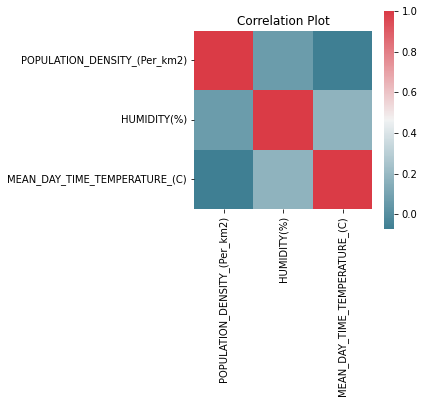

In [ ]:
fig, ax =plt.subplots(figsize=(4, 4))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

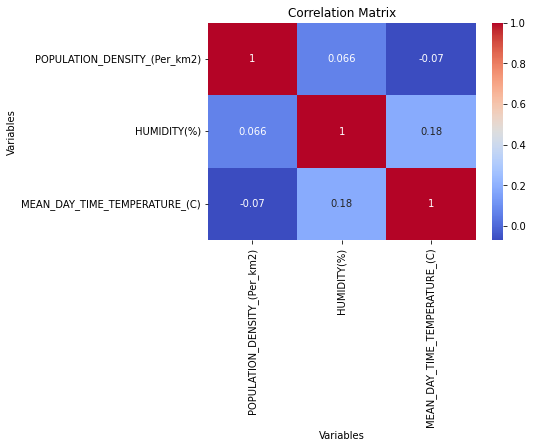

Correlation between POPULATION_DENSITY_(Per_km2) and HUMIDITY(%): 0.07 (p-value: 0.24)
Correlation between POPULATION_DENSITY_(Per_km2) and MEAN_DAY_TIME_TEMPERATURE_(C): -0.07 (p-value: 0.21)
Correlation between HUMIDITY(%) and POPULATION_DENSITY_(Per_km2): 0.07 (p-value: 0.24)
Correlation between HUMIDITY(%) and MEAN_DAY_TIME_TEMPERATURE_(C): 0.18 (p-value: 0.00)
Correlation between MEAN_DAY_TIME_TEMPERATURE_(C) and POPULATION_DENSITY_(Per_km2): -0.07 (p-value: 0.21)
Correlation between MEAN_DAY_TIME_TEMPERATURE_(C) and HUMIDITY(%): 0.18 (p-value: 0.00)


In [ ]:

# Calculate the correlation coefficients
corr = Ques_1[["POPULATION_DENSITY_(Per_km2)", "HUMIDITY(%)", "MEAN_DAY_TIME_TEMPERATURE_(C)"]].corr()

# Create a heatmap plot of the correlation matrix
sns.heatmap(corr, annot=True, cmap="coolwarm")

# Set the plot title and axes labels
plt.title("Correlation Matrix")
plt.xlabel("Variables")
plt.ylabel("Variables")

# Show the plot
plt.show()

# Print the correlation coefficients and p-values
from scipy.stats import pearsonr

for var1 in corr.columns:
    for var2 in corr.index:
        if var1 != var2:
            r, p = pearsonr(Ques_1[var1], Ques_1[var2])
            print(f"Correlation between {var1} and {var2}: {r:.2f} (p-value: {p:.2f})")

In [ ]:
Ques_1['POPULATION_DENSITY_(Per_km2)']

0      20686.0
1      20686.0
2      43064.0
3      43064.0
4      23866.0
        ...   
329      891.0
330    20686.0
332    43064.0
333    43064.0
334    43064.0
Name: POPULATION_DENSITY_(Per_km2), Length: 313, dtype: float64

<ipython-input-13-d887e2d41f31>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Ques_1['POPULATION_DENSITY_(Per_km2)']);


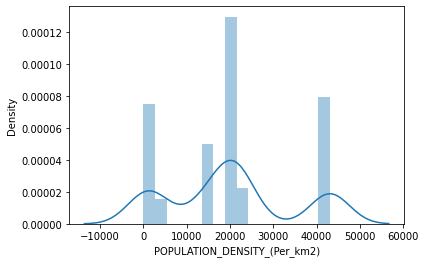

In [ ]:
#histogram
sns.distplot(Ques_1['POPULATION_DENSITY_(Per_km2)']);

In [ ]:
pearson_coef, p_value = stats.pearsonr(Ques_1['POPULATION_DENSITY_(Per_km2)'], Ques_1['HUMIDITY(%)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.06597050204671696  with a P-value of P = 0.2445311090918681


In [ ]:
pearson_coef, p_value = stats.pearsonr(Ques_1['POPULATION_DENSITY_(Per_km2)'], Ques_1['MEAN_DAY_TIME_TEMPERATURE_(C)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.07033181283456352  with a P-value of P = 0.21465912736513437


In [ ]:
columns_with_na2 = ['difference_of_hematocrit', 'Difference_in_Platelet_Count']
Ques_2 = df.dropna(axis=0, subset = columns_with_na2)
Ques_2.info()

In [ ]:
columns_with_na2a = ['HIGHEST_PLATELET', 'LOWEST_PLATELET', 'HIGHEST_HEMATOCRIT', 'LOWEST_HEMATOCRIT']
Ques_2a = df.dropna(axis=0, subset = columns_with_na2a)
Ques_2a.info()

In [ ]:
Ques_2a['LOWEST_PLATELET']

0       34.0
1       13.0
2       27.0
3       25.0
4       50.0
       ...  
326    113.0
327     27.0
329     17.0
333    150.0
334     78.0
Name: LOWEST_PLATELET, Length: 313, dtype: float64

In [ ]:
# Calculate the mean of platelet count
Ques_2a['Platelet_count_mean'] = (Ques_2a["HIGHEST_PLATELET"] + Ques_2a["LOWEST_PLATELET"]) / 2

# Print the mean of platelet count column
print(Ques_2a['Platelet_count_mean'])

0       60.0
1       25.5
2       27.5
3      286.5
4      148.5
       ...  
326    171.5
327     69.5
329     23.5
333    192.0
334    103.5
Name: Platelet_count_mean, Length: 313, dtype: float64


<ipython-input-27-f24da61f30b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ques_2a['Platelet_count_mean'] = (Ques_2a["HIGHEST_PLATELET"] + Ques_2a["LOWEST_PLATELET"]) / 2


In [ ]:
# Calculate the mean of hematocrit
Ques_2a['HEMATOCRIT_mean'] = (Ques_2a["HIGHEST_HEMATOCRIT"] + Ques_2a["LOWEST_HEMATOCRIT"]) / 2

# Print the mean of platelet count column
print(Ques_2a['HEMATOCRIT_mean'])

0      40.50
1      37.00
2      40.50
3      36.00
4      31.50
       ...  
326    39.10
327    42.60
329    38.95
333    45.10
334    31.40
Name: HEMATOCRIT_mean, Length: 313, dtype: float64


<ipython-input-28-c8385809e13b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ques_2a['HEMATOCRIT_mean'] = (Ques_2a["HIGHEST_HEMATOCRIT"] + Ques_2a["LOWEST_HEMATOCRIT"]) / 2


<Axes: xlabel='HEMATOCRIT_mean', ylabel='Platelet_count_mean'>

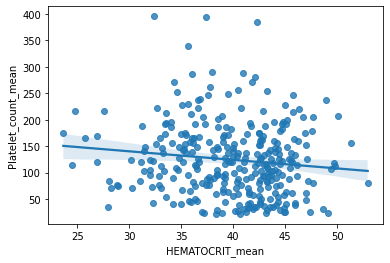

In [ ]:
sns.regplot(x="HEMATOCRIT_mean", y="Platelet_count_mean", data=Ques_2a)

<Axes: xlabel='Platelet_count_mean', ylabel='HEMATOCRIT_mean'>

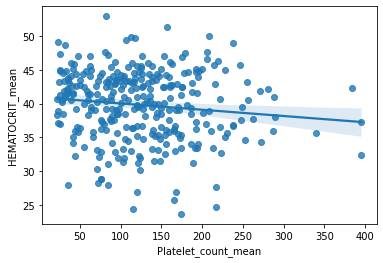

In [ ]:
sns.regplot(x="Platelet_count_mean", y="HEMATOCRIT_mean", data=Ques_2a)

In [ ]:
columns_with_na4 = ['Difference_in_Platelet_Count','LENGTH_OF_HOSPITAL_STAY', 'DAYS_OF_ILLNESS']
Ques_4 = df.dropna(axis=0, subset = columns_with_na4)
Ques_4.info()

In [ ]:
columns_with_na4a = ['HIGHEST_PLATELET', 'LOWEST_PLATELET', 'LENGTH_OF_HOSPITAL_STAY', 'DAYS_OF_ILLNESS']
Ques_4a = df.dropna(axis=0, subset = columns_with_na4a)
Ques_4a.info()

In [ ]:
# Calculate the mean of platelet count
Ques_4a['Platelet_count_mean'] = (Ques_4a["HIGHEST_PLATELET"] + Ques_4a["LOWEST_PLATELET"]) / 2

# Print the mean of platelet count column
print(Ques_4a['Platelet_count_mean'])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


# Define the variables
platelet_count = Ques_4a["Platelet_count_mean"]
days_of_illness = Ques_4a["DAYS_OF_ILLNESS"]
hospitalization = Ques_4a["LENGTH_OF_HOSPITAL_STAY"]


In [ ]:
# Define a function to get the thrombocytopenia grade
def get_thrombocytopenia_grade(count):
    if count > 150:
        return "Normal"
    elif 75 <= count <= 150:
        return "Grade 1 Thrombocytopenia"
    elif 50 <= count < 75:
        return "Grade 2 Thrombocytopenia"
    elif 25 <= count < 50:
        return "Grade 3 Thrombocytopenia"
    else:
        return "Grade 4 Thrombocytopenia"

# Apply the function to the platelet counts
platelet_grade = platelet_count.apply(get_thrombocytopenia_grade)


Thrombocytopenia grade Grade 2 Thrombocytopenia: Pearson correlation coefficient: 0.05, p-value: 0.83
Thrombocytopenia grade Grade 3 Thrombocytopenia: Pearson correlation coefficient: -0.04, p-value: 0.81
Thrombocytopenia grade Grade 4 Thrombocytopenia: Pearson correlation coefficient: -0.58, p-value: 0.23
Thrombocytopenia grade Normal: Pearson correlation coefficient: 0.01, p-value: 0.96
Thrombocytopenia grade Grade 1 Thrombocytopenia: Pearson correlation coefficient: -0.17, p-value: 0.08


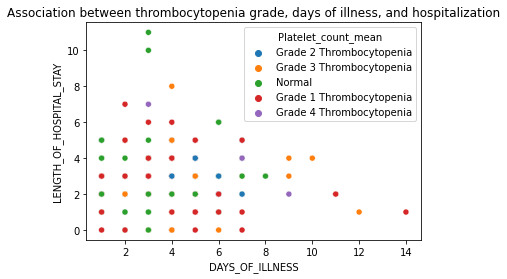

In [ ]:
# Generate the scatter plot
sns.scatterplot(x=days_of_illness, y=hospitalization, hue=platelet_grade)
plt.title("Association between thrombocytopenia grade, days of illness, and hospitalization")

# Calculate the Pearson correlation coefficient and p-value for each grade
for grade in set(platelet_grade):
    indices = platelet_grade == grade
    corr_coeff, p_value = pearsonr(days_of_illness[indices], hospitalization[indices])
    print(f"Thrombocytopenia grade {grade}: Pearson correlation coefficient: {corr_coeff:.2f}, p-value: {p_value:.2f}")

# Display the plot
plt.show()

Pearson correlation coefficient between thrombocytopenia grade and days of illness: 0.25, p-value: 0.00


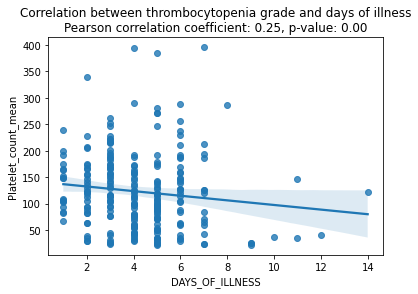

In [ ]:
# Calculate the Pearson correlation coefficient and p-value for days of illness
corr_coeff, p_value = pearsonr(days_of_illness, platelet_grade.replace({
    "Normal": 0,
    "Grade 1 Thrombocytopenia": 1,
    "Grade 2 Thrombocytopenia": 2,
    "Grade 3 Thrombocytopenia": 3,
    "Grade 4 Thrombocytopenia": 4
}))
print(f"Pearson correlation coefficient between thrombocytopenia grade and days of illness: {corr_coeff:.2f}, p-value: {p_value:.2f}")

# Generate a correlation bubble plot for days of illness
sns.regplot(x=days_of_illness, y=platelet_count, data=Ques_4a)
plt.title(f"Correlation between thrombocytopenia grade and days of illness\nPearson correlation coefficient: {corr_coeff:.2f}, p-value: {p_value:.2f}")
plt.show()

Pearson correlation coefficient between thrombocytopenia grade and days of illness: 0.01, p-value: 0.92


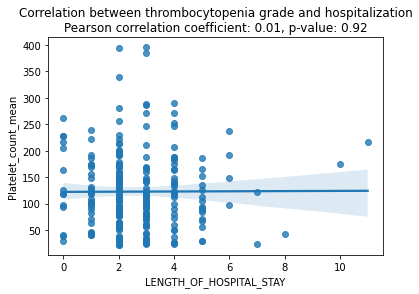

In [ ]:
# Calculate the Pearson correlation coefficient and p-value for hospiatalization
corr_coeff, p_value = pearsonr(hospitalization, platelet_grade.replace({
    "Normal": 0,
    "Grade 1 Thrombocytopenia": 1,
    "Grade 2 Thrombocytopenia": 2,
    "Grade 3 Thrombocytopenia": 3,
    "Grade 4 Thrombocytopenia": 4
}))
print(f"Pearson correlation coefficient between thrombocytopenia grade and days of illness: {corr_coeff:.2f}, p-value: {p_value:.2f}")

# Generate a correlation bubble plot for days of illness
sns.regplot(x=hospitalization, y=platelet_count, data=Ques_4a)
plt.title(f"Correlation between thrombocytopenia grade and hospitalization\nPearson correlation coefficient: {corr_coeff:.2f}, p-value: {p_value:.2f}")
plt.show()

In [ ]:
columns_with_na5 = ['Difference_in_Platelet_Count','AGE', 'GENDER']
Ques_5 = df.dropna(axis=0, subset = columns_with_na5)
Ques_5.info()


In [ ]:
columns_with_na5a = ['HIGHEST_PLATELET', 'LOWEST_PLATELET','AGE', 'GENDER', 'Difference_in_Platelet_Count']
Ques_5a = df.dropna(axis=0, subset = columns_with_na5a)
Ques_5a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 334
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DENGUE_ANTIGEN_positive_date   274 non-null    object 
 1   DENGUE_ANTIBODY_positive_date  43 non-null     object 
 2   AGE                            314 non-null    int64  
 3   GENDER                         314 non-null    object 
 4   Dengue_severity                314 non-null    object 
 5   LENGTH_OF_HOSPITAL_STAY        289 non-null    float64
 6   DAYS_OF_ILLNESS                250 non-null    float64
 7   Hypertension                   314 non-null    object 
 8   Diabetes                       314 non-null    object 
 9   Cardiovascular_disease         314 non-null    object 
 10  Associated_conditions          112 non-null    object 
 11  Effusions                      314 non-null    object 
 12  Antibiotics_used?              314 non-null    obj

In [ ]:
# Calculate the mean of platelet count
Ques_5a['Platelet_count_mean'] = (Ques_5a["HIGHEST_PLATELET"] + Ques_5a["LOWEST_PLATELET"]) / 2

# Print the mean of platelet count column
print(Ques_5a['Platelet_count_mean'])

0       60.0
1       25.5
2       27.5
3      286.5
4      148.5
       ...  
326    171.5
327     69.5
329     23.5
333    192.0
334    103.5
Name: Platelet_count_mean, Length: 314, dtype: float64


<ipython-input-15-7ba06c08d031>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ques_5a['Platelet_count_mean'] = (Ques_5a["HIGHEST_PLATELET"] + Ques_5a["LOWEST_PLATELET"]) / 2


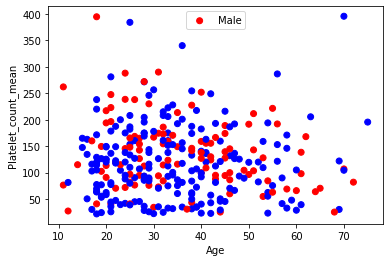

In [ ]:

# Create a scatter plot of age vs platelet count, colored by gender
fig, ax = plt.subplots()
colors = {'M':'blue', 'F':'red'}
ax.scatter(Ques_5a['AGE'], Ques_5a['Platelet_count_mean'], c=Ques_5a['GENDER'].apply(lambda x: colors[x]))
ax.set_xlabel('Age')
ax.set_ylabel('Platelet_count_mean')
ax.legend(['Male', 'Female'])
plt.show()


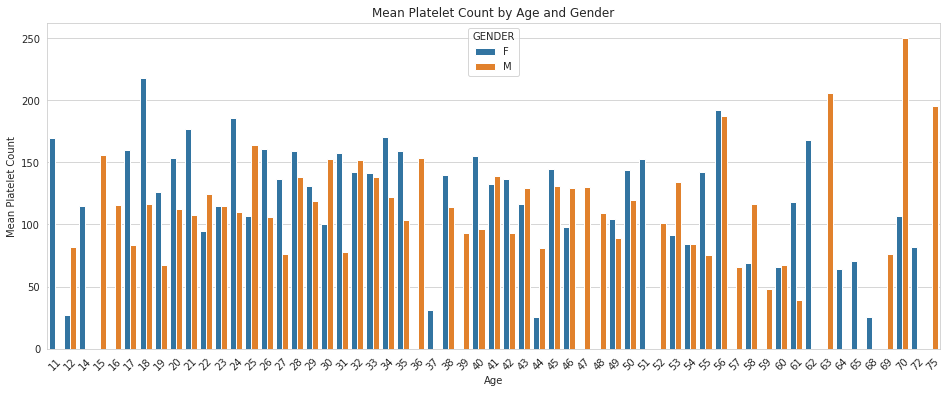

In [ ]:



# calculate mean platelet count by age and gender
mean_platelet_count = Ques_5a.groupby(['AGE', 'GENDER'], as_index=False)['Platelet_count_mean'].mean()

# plot graph
sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))
sns.barplot(x='AGE', y='Platelet_count_mean', hue='GENDER', data=mean_platelet_count)
plt.title("Mean Platelet Count by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Mean Platelet Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Create a bar graph of platelet count by age
# Create age groups
age_groups = pd.cut(Ques_5a["AGE"], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Group data by age and age group
age_count = Ques_5a.groupby([age_groups, "AGE"])['Platelet_count_mean'].mean()

# Create a bar chart of platelet count by age
age_count.plot(kind="bar", color="red")
plt.title("Platelet Count by Age")
plt.xlabel("Age Group")
plt.ylabel("Platelet Count")
plt.xticks(rotation=45)
plt.show()

# Create a bar graph of platelet count by gender
gender_count = Ques_5a.groupby("GENDER")['Platelet_count_mean'].mean()
gender_count.plot(kind="bar", color="red")
plt.title("Platelet count by Gender")
plt.xlabel("Gender")
plt.xticks([0, 1], ["Male", "Female"])
plt.ylabel("Platelet Count")
plt.show()



In [ ]:
columns_with_na6 = ['HIGHEST_PLATELET', 'LOWEST_PLATELET','TLC/WBC']
Ques_6 = df.dropna(axis=0, subset = columns_with_na6)
Ques_6.info()

In [ ]:
# Calculate the mean of platelet count
Ques_6['Platelet_count_mean'] = (Ques_6["HIGHEST_PLATELET"] + Ques_6["LOWEST_PLATELET"]) / 2

# Print the mean of platelet count column
print(Ques_6['Platelet_count_mean'])

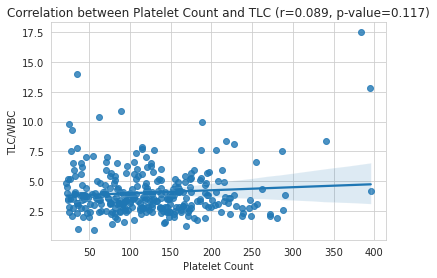

In [ ]:
from scipy.stats import pearsonr
# Calculate the correlation and p-value between platelet count and TLC
corr, pval = pearsonr(Ques_6['Platelet_count_mean'], Ques_6["TLC/WBC"])

# Create a scatter plot with a regression line
sns.regplot(x='Platelet_count_mean', y="TLC/WBC", data=Ques_6)
plt.title("Correlation between Platelet Count and TLC (r={:.3f}, p-value={:.3f})".format(corr, pval))
plt.xlabel("Platelet Count")
plt.ylabel("TLC/WBC")
plt.show()


In [ ]:
columns_with_na7 = ['LENGTH_OF_HOSPITAL_STAY','HIGHEST_HEMATOCRIT', 'LOWEST_HEMATOCRIT']
Ques_7 = df.dropna(axis=0, subset = columns_with_na7)
Ques_7.info()

In [ ]:
# Calculate the mean of platelet count
Ques_7['Hematocrit_mean'] = (Ques_7["HIGHEST_PLATELET"] + Ques_7["LOWEST_PLATELET"]) / 2

# Print the mean of platelet count column
print(Ques_7['Hematocrit_mean'])

In [ ]:
import statsmodels.api as sm
# Create a linear regression model with hematocrit as the predictor and hospitalization days as the outcome
X = Ques_7['Hematocrit_mean']
y = Ques_7["LENGTH_OF_HOSPITAL_STAY"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                               OLS Regression Results                              
Dep. Variable:     LENGTH_OF_HOSPITAL_STAY   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                 -0.003
Method:                      Least Squares   F-statistic:                    0.1074
Date:                     Mon, 27 Mar 2023   Prob (F-statistic):              0.743
Time:                             13:54:52   Log-Likelihood:                -551.64
No. Observations:                      288   AIC:                             1107.
Df Residuals:                          286   BIC:                             1115.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

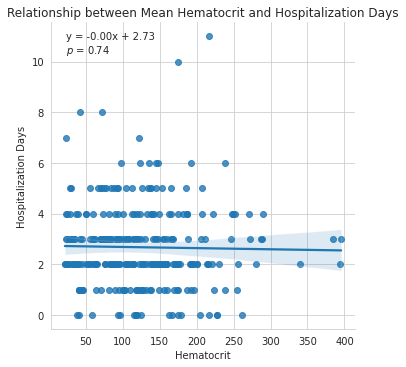

In [ ]:
from scipy.stats import linregress
# Create a linear regression model with hematocrit as the predictor and hospitalization days as the outcome
model = sns.lmplot(x='Hematocrit_mean', y="LENGTH_OF_HOSPITAL_STAY", data=Ques_7)

# Set the plot title and axes labels
plt.title("Relationship between Mean Hematocrit and Hospitalization Days")
plt.xlabel("Hematocrit")
plt.ylabel("Hospitalization Days")


# Get the regression coefficients and p-value
slope, intercept, r_value, p_value, std_err = linregress(Ques_7['Hematocrit_mean'], Ques_7["LENGTH_OF_HOSPITAL_STAY"])

# Add the regression equation and p-value to the plot
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\n$p$ = {p_value:.2f}", xy=(0.05, 0.9), xycoords="axes fraction")

# Show the plot
plt.show()


In [ ]:
columns_with_na3 = ['LENGTH_OF_HOSPITAL_STAY', 'DAYS_OF_ILLNESS', 'Dengue_severity', "HIGHEST_PLATELET", "LOWEST_PLATELET"]
Ques_3 = df.dropna(axis=0, subset = columns_with_na3)
Ques_3.info()

In [ ]:
# Calculate the mean of platelet count using the difference in platelet count column
Ques_3['Platelet_count_mean'] = (Ques_3["HIGHEST_PLATELET"] + Ques_3["LOWEST_PLATELET"]) / 2

# Print the mean of platelet count column
print(Ques_3['Platelet_count_mean'])


0       60.0
1       25.5
2       27.5
3      286.5
4      148.5
       ...  
326    171.5
327     69.5
329     23.5
333    192.0
334    103.5
Name: Platelet_count_mean, Length: 246, dtype: float64


<ipython-input-33-b7c0004c9a65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ques_3['Platelet_count_mean'] = (Ques_3["HIGHEST_PLATELET"] + Ques_3["LOWEST_PLATELET"]) / 2


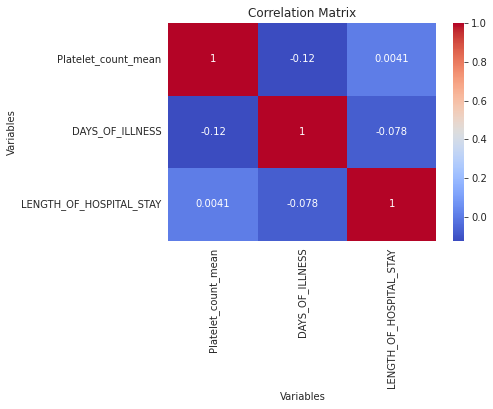

Correlation between Platelet_count_mean and DAYS_OF_ILLNESS: -0.12 (p-value: 0.05)
Correlation between Platelet_count_mean and LENGTH_OF_HOSPITAL_STAY: 0.00 (p-value: 0.95)
Correlation between DAYS_OF_ILLNESS and Platelet_count_mean: -0.12 (p-value: 0.05)
Correlation between DAYS_OF_ILLNESS and LENGTH_OF_HOSPITAL_STAY: -0.08 (p-value: 0.22)
Correlation between LENGTH_OF_HOSPITAL_STAY and Platelet_count_mean: 0.00 (p-value: 0.95)
Correlation between LENGTH_OF_HOSPITAL_STAY and DAYS_OF_ILLNESS: -0.08 (p-value: 0.22)


In [ ]:

# Calculate the correlation coefficients
corr = Ques_3[["Platelet_count_mean", "Dengue_severity", "DAYS_OF_ILLNESS", "LENGTH_OF_HOSPITAL_STAY"]].corr()

# Create a heatmap plot of the correlation matrix
sns.heatmap(corr, annot=True, cmap="coolwarm")

# Set the plot title and axes labels
plt.title("Correlation Matrix")
plt.xlabel("Variables")
plt.ylabel("Variables")

# Show the plot
plt.show()

# Print the correlation coefficients and p-values
from scipy.stats import pearsonr

for var1 in corr.columns:
    for var2 in corr.index:
        if var1 != var2:
            r, p = pearsonr(Ques_3[var1], Ques_3[var2])
            print(f"Correlation between {var1} and {var2}: {r:.2f} (p-value: {p:.2f})")


In [ ]:
Ques_3['Platelet_count_mean']

0       60.0
1       25.5
2       27.5
3      286.5
4      148.5
       ...  
326    171.5
327     69.5
329     23.5
333    192.0
334    103.5
Name: Platelet_count_mean, Length: 246, dtype: float64

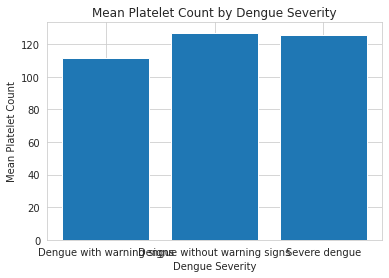

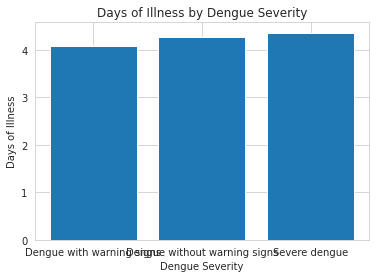

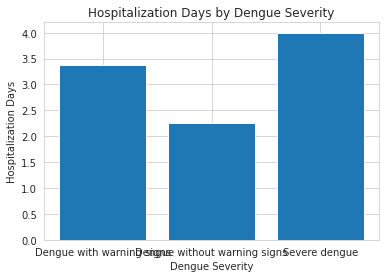

In [ ]:

# Group the data by dengue severity and calculate the mean of platelet count, days of illness, and hospitalization days
grouped_data = Ques_3.groupby("Dengue_severity").mean()[["Platelet_count_mean", "DAYS_OF_ILLNESS", "LENGTH_OF_HOSPITAL_STAY"]]

# Reset the index to make dengue severity a regular column
grouped_data = grouped_data.reset_index()

# Plot the bar chart for mean platelet count by dengue severity
plt.bar(grouped_data["Dengue_severity"], grouped_data["Platelet_count_mean"])
plt.title("Mean Platelet Count by Dengue Severity")
plt.xlabel("Dengue Severity")
plt.ylabel("Mean Platelet Count")
plt.show()

# Plot the bar chart for days of illness by dengue severity
plt.bar(grouped_data["Dengue_severity"], grouped_data["DAYS_OF_ILLNESS"])
plt.title("Days of Illness by Dengue Severity")
plt.xlabel("Dengue Severity")
plt.ylabel("Days of Illness")
plt.show()

# Plot the bar chart for hospitalization days by dengue severity
plt.bar(grouped_data["Dengue_severity"], grouped_data["LENGTH_OF_HOSPITAL_STAY"])
plt.title("Hospitalization Days by Dengue Severity")
plt.xlabel("Dengue Severity")
plt.ylabel("Hospitalization Days")
plt.show()


In [ ]:
columns_with_na10 = ['BUN', 'CRET', 'eGFR', "DAYS_OF_ILLNESS", "LENGTH_OF_HOSPITAL_STAY", 'GENDER']
Ques_10 = df.dropna(axis=0, subset = columns_with_na10)
Ques_10.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 334
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DENGUE_ANTIGEN_positive_date   112 non-null    object 
 1   DENGUE_ANTIBODY_positive_date  16 non-null     object 
 2   AGE                            128 non-null    int64  
 3   GENDER                         128 non-null    object 
 4   Dengue_severity                128 non-null    object 
 5   LENGTH_OF_HOSPITAL_STAY        128 non-null    float64
 6   DAYS_OF_ILLNESS                128 non-null    float64
 7   Hypertension                   128 non-null    object 
 8   Diabetes                       128 non-null    object 
 9   Cardiovascular_disease         128 non-null    object 
 10  Associated_conditions          53 non-null     object 
 11  Effusions                      128 non-null    object 
 12  Antibiotics_used?              128 non-null    obj

In [ ]:
f = pd.melt(df_dropped, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [ ]:
from scipy.stats import shapiro

stat1, p1 = shapiro(df_dropped['POPULATION DENSITY (Per km2)'],)


if p1 > 0.05:
    s1 = 'It is normally distributed.'
else:
    s1 = 'It is not normally distributed'

plt.figure(figsize=(20,6))

plt.subplot(121)
sns.histplot(df_dropped['POPULATION DENSITY (Per km2)'],kde=True, color='red')
plt.axvline(df_dropped['POPULATION DENSITY (Per km2)'].mean(), color='k', linestyle='dashed', linewidth=2)

plt.title("Stats:"+ str(stat1)+" ,  P value:" + str(p1)+ "  , " + s1)

In [ ]:
from scipy.stats import shapiro

stat1, p1 = shapiro(df_dropped['HUMIDITY(%)'])


if p1 > 0.05:
    s1 = 'It is normally distributed.'
else:
    s1 = 'It is not normally distributed'

plt.figure(figsize=(20,6))

plt.subplot(121)
sns.histplot(df_dropped['HUMIDITY(%)'],kde=True, color='red')
plt.axvline(df_dropped['HUMIDITY(%)'].mean(), color='k', linestyle='dashed', linewidth=2)

plt.title("Stats:"+ str(stat1)+" ,  P value:" + str(p1)+ "  , " + s1)

In [ ]:
from scipy.stats import shapiro

stat1, p1 = shapiro(df_dropped['MEAN DAY TIME TEMPERATURE (C)'])


if p1 > 0.05:
    s1 = 'It is normally distributed.'
else:
    s1 = 'It is not normally distributed'

plt.figure(figsize=(20,6))

plt.subplot(121)
sns.histplot(df_dropped['MEAN DAY TIME TEMPERATURE (C)'],kde=True, color='red')
plt.axvline(df_dropped['MEAN DAY TIME TEMPERATURE (C)'].mean(), color='k', linestyle='dashed', linewidth=2)

plt.title("Stats:"+ str(stat1)+" ,  P value:" + str(p1)+ "  , " + s1)
